In [1]:
from __future__ import print_function
from packaging.version import parse as Version
from platform import python_version

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.12 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == Version(min_ver):
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(python_version())

if pyversion >= Version("3.12.5"):
    print(OK, "Python version is %s" % pyversion)
elif pyversion < Version("3.12.5"):
    print(FAIL, "Python version 3.12.5 is required,"
                " but %s is installed." % pyversion)
else:
    print(FAIL, "Unknown Python version: %s" % pyversion)

    
print()
requirements = {'numpy': "1.26.4", 'matplotlib': "3.9.2",'sklearn': "1.5.1", 
                'pandas': "2.2.2",'xgboost': "2.1.1", 'shap': "0.45.1", 
                'plotly': "5.23.0"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.12.5

[ OK ] numpy version 1.26.4 is installed.
[ OK ] matplotlib version 3.9.2 is installed.
[ OK ] sklearn version 1.5.1 is installed.
[ OK ] pandas version 2.2.2 is installed.
[ OK ] xgboost version 2.1.1 is installed.
[ OK ] shap version 0.45.1 is installed.
[ OK ] plotly version 5.23.0 is installed.


In [2]:
#Reading data

import pandas as pd

df = pd.read_csv('data/ad_click_dataset.csv')
print(df)

        id full_name   age      gender device_type ad_position  \
0      670   User670  22.0         NaN     Desktop         Top   
1     3044  User3044   NaN        Male     Desktop         Top   
2     5912  User5912  41.0  Non-Binary         NaN        Side   
3     5418  User5418  34.0        Male         NaN         NaN   
4     9452  User9452  39.0  Non-Binary         NaN         NaN   
...    ...       ...   ...         ...         ...         ...   
9995  8510  User8510   NaN         NaN      Mobile         Top   
9996  7843  User7843   NaN      Female     Desktop      Bottom   
9997  3914  User3914   NaN        Male      Mobile        Side   
9998  7924  User7924   NaN         NaN     Desktop         NaN   
9999  3056  User3056  44.0        Male      Tablet         Top   

     browsing_history time_of_day  click  
0            Shopping   Afternoon      1  
1                 NaN         NaN      1  
2           Education       Night      1  
3       Entertainment     Evening  

In [3]:
print(f'We have total {len(df)} rows and {len(df.columns)} columns in the dataframe.')

We have total 10000 rows and 9 columns in the dataframe.


In [4]:
print(df.columns)

Index(['id', 'full_name', 'age', 'gender', 'device_type', 'ad_position',
       'browsing_history', 'time_of_day', 'click'],
      dtype='object')


In [5]:
for column in df.columns:
    print(f"{column}, {df[column].dtype}")

id, int64
full_name, object
age, float64
gender, object
device_type, object
ad_position, object
browsing_history, object
time_of_day, object
click, int64


In [6]:
#Gender Types - Female, Male, Non-Binary
#for types in df['gender']:
 #   print(types)

In [7]:
#Device Types - Desktop, Mobile, Tablet
#for types in df['device_type']:
#    print(types)

In [8]:
#AD Positions - Top, Side, Bottom
#for position in df['ad_position']:
#    print(position)

In [9]:
#Browsing History Details - Shopping, Education, Social Media, News, Entertainment
#for details in df['browsing_history']:
#    print(details)

In [10]:
#Times of Day - Afternoon, Morning, Evening, Morning
#for time in df['time_of_day']:
#    print(time)

In [11]:
print(df['click'].describe())
#My target variable click is categorical. 

count    10000.000000
mean         0.650000
std          0.476993
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: click, dtype: float64


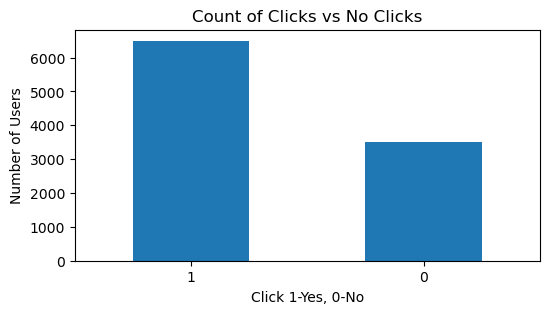

This graph shows how many users clicked on the ad. (1-Yes clicked, 0-No)


In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,3))
df['click'].value_counts().plot.bar()
plt.xlabel('Click 1-Yes, 0-No')
plt.ylabel('Number of Users')
plt.title('Count of Clicks vs No Clicks')
plt.xticks(rotation=0)
plt.show()
print('This graph shows how many users clicked on the ad. (1-Yes clicked, 0-No)')

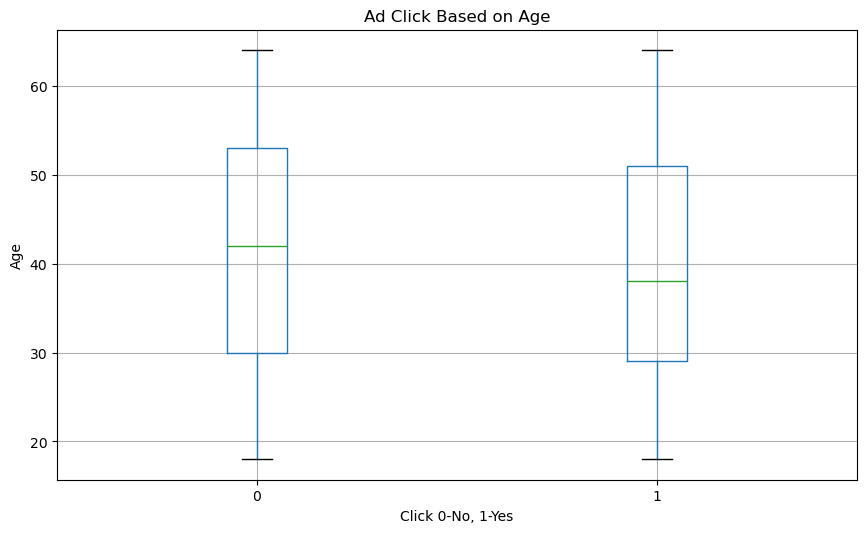

This graph shows how many users clicked on the ad based on their age. (1-Yes clicked, 0-No)


In [13]:
#Continous vs Categorical - Age vs Click(Target Variable) Boxplot

df[['age','click']].boxplot(by='click',figsize=(10,6))
plt.xlabel('Click 0-No, 1-Yes')
plt.ylabel('Age')
plt.title('Ad Click Based on Age') 
plt.suptitle('')
plt.show()
print('This graph shows how many users clicked on the ad based on their age. (1-Yes clicked, 0-No)')

<Figure size 1000x500 with 0 Axes>

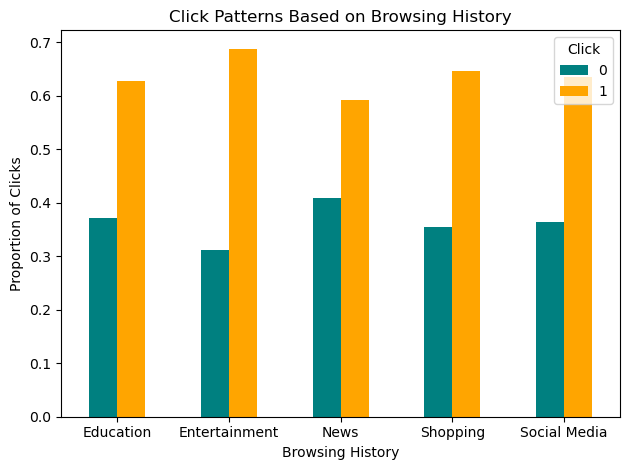

This graph shows proportion of ad clicks based on users browsing history. (1-Yes clicked, 0-No)


In [14]:
#Categorical vs Categorical - Browsing History vs Click(Target Variable) Grouped Bar Plot

plot = pd.crosstab(df['browsing_history'], df['click'], normalize='index')

plt.figure(figsize=(10, 5))
plot.plot(kind='bar', color=['Teal', 'orange'])
plt.title('Click Patterns Based on Browsing History')
plt.xlabel('Browsing History')
plt.ylabel('Proportion of Clicks')
plt.xticks(rotation=0)
plt.legend(title='Click')
plt.tight_layout()
plt.show()
print('This graph shows proportion of ad clicks based on users browsing history. (1-Yes clicked, 0-No)')

<Figure size 1000x500 with 0 Axes>

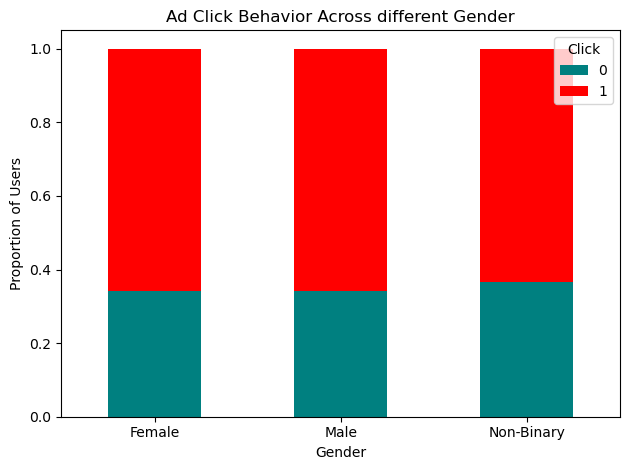

This graph shows proportion of ad clicks based on users gender. (1-Yes clicked, 0-No)


In [15]:
#Categorical vs Categorical - Gender vs Click(Target Variable) Stacked Bar Plot

browsing_click_data = pd.crosstab(df['gender'], df['click'], normalize='index')

plt.figure(figsize=(10, 5))
browsing_click_data.plot(kind='bar', stacked=True, color=['Teal', 'Red'])
plt.title('Ad Click Behavior Across different Gender')
plt.xlabel('Gender')
plt.ylabel('Proportion of Users')
plt.xticks(rotation=0)
plt.legend(title='Click')
plt.tight_layout()
plt.show()
print('This graph shows proportion of ad clicks based on users gender. (1-Yes clicked, 0-No)')

<Figure size 1000x500 with 0 Axes>

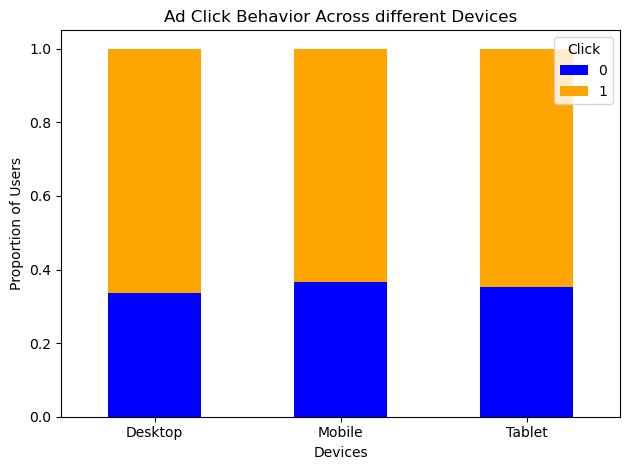

This graph shows proportion of ad clicks based on users device type. (1-Yes clicked, 0-No)


In [16]:
#Categorical vs Categorical - Device Type vs Click(Target Variable) Stacked Bar Plot

browsing_click_data = pd.crosstab(df['device_type'], df['click'], normalize='index')

plt.figure(figsize=(10, 5))
browsing_click_data.plot(kind='bar', stacked=True, color=['Blue', 'Orange'])
plt.title('Ad Click Behavior Across different Devices')
plt.xlabel('Devices')
plt.ylabel('Proportion of Users')
plt.xticks(rotation=0)
plt.legend(title='Click')
plt.tight_layout()
plt.show()
print('This graph shows proportion of ad clicks based on users device type. (1-Yes clicked, 0-No)')

<Figure size 1000x500 with 0 Axes>

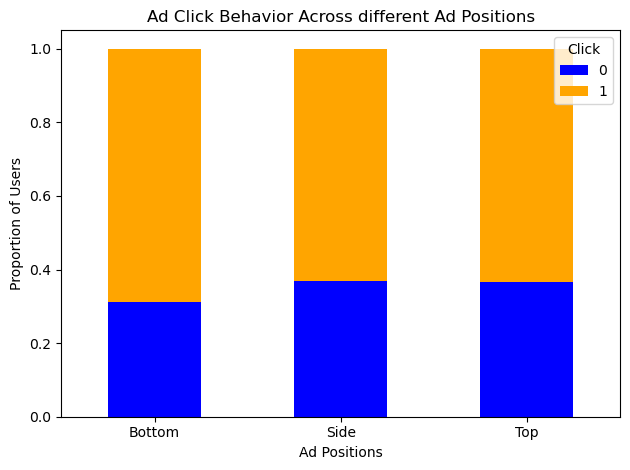

This graph shows proportion of ad clicks based on position of ads. (1-Yes clicked, 0-No)


In [17]:
#Categorical vs Categorical - Ad Position vs Click(Target Variable) Stacked Bar Plot

browsing_click_data = pd.crosstab(df['ad_position'], df['click'], normalize='index')

plt.figure(figsize=(10, 5))
browsing_click_data.plot(kind='bar', stacked=True, color=['Blue', 'Orange'])
plt.title('Ad Click Behavior Across different Ad Positions')
plt.xlabel('Ad Positions')
plt.ylabel('Proportion of Users')
plt.xticks(rotation=0)
plt.legend(title='Click')
plt.tight_layout()
plt.show()
print('This graph shows proportion of ad clicks based on position of ads. (1-Yes clicked, 0-No)')

<Figure size 1000x500 with 0 Axes>

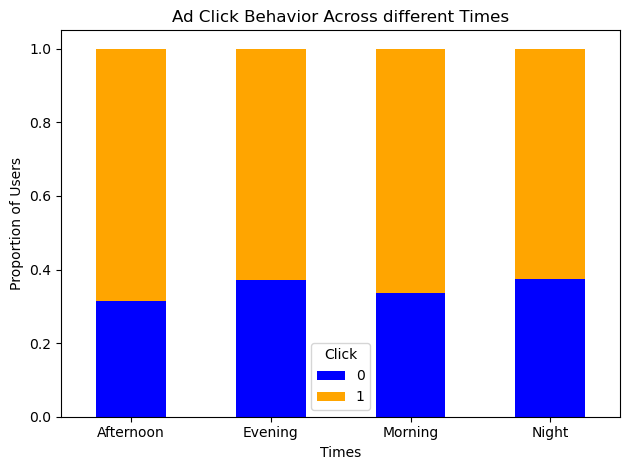

This graph shows proportion of ad clicks based on different time of the day. (1-Yes clicked, 0-No)


In [18]:
#Categorical vs Categorical - Time of the Day vs Click(Target Variable) Stacked Bar Plot

browsing_click_data = pd.crosstab(df['time_of_day'], df['click'], normalize='index')

plt.figure(figsize=(10, 5))
browsing_click_data.plot(kind='bar', stacked=True, color=['Blue', 'Orange'])
plt.title('Ad Click Behavior Across different Times')
plt.xlabel('Times')
plt.ylabel('Proportion of Users')
plt.xticks(rotation=0)
plt.legend(title='Click')
plt.tight_layout()
plt.show()
print('This graph shows proportion of ad clicks based on different time of the day. (1-Yes clicked, 0-No)')

<Figure size 1000x500 with 0 Axes>

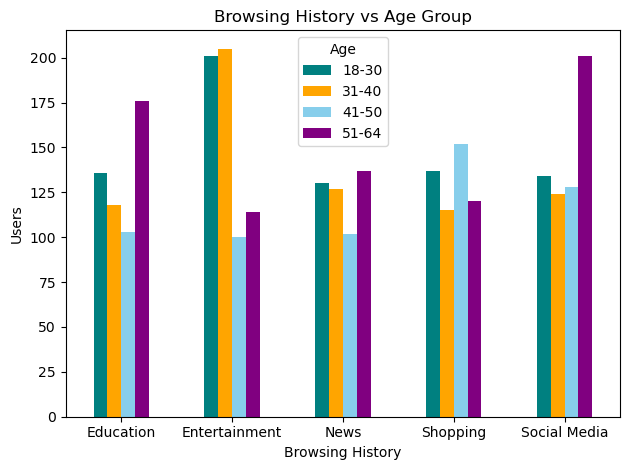

This graph shows browsing history of users based on their age.


In [19]:
#Categorical vs Categorical - Age vs Browsing History

age_bins = [18, 30, 40, 50, 64]
age_labels = ['18-30', '31-40', '41-50', '51-64']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)
plot = pd.crosstab(df['browsing_history'], df['age_group'])

plt.figure(figsize=(10, 5))
plot.plot(kind='bar', color=['Teal', 'orange', 'skyblue', 'purple'])
plt.title('Browsing History vs Age Group')
plt.xlabel('Browsing History')
plt.ylabel('Users')
plt.xticks(rotation=0)
plt.legend(title='Age')
plt.tight_layout()
plt.show()
print('This graph shows browsing history of users based on their age.')

In [20]:
df = df.drop(columns=['age_group'])
print(df.head())

     id full_name   age      gender device_type ad_position browsing_history  \
0   670   User670  22.0         NaN     Desktop         Top         Shopping   
1  3044  User3044   NaN        Male     Desktop         Top              NaN   
2  5912  User5912  41.0  Non-Binary         NaN        Side        Education   
3  5418  User5418  34.0        Male         NaN         NaN    Entertainment   
4  9452  User9452  39.0  Non-Binary         NaN         NaN     Social Media   

  time_of_day  click  
0   Afternoon      1  
1         NaN      1  
2       Night      1  
3     Evening      1  
4     Morning      0  


In [21]:
'''# your code here
import numpy as np
from sklearn.model_selection import train_test_split 

df = df.drop(columns=['full_name']) #Dropping full name, as it adds no value
X = df.loc[:, df.columns != 'click']
y = df['click']  #Target variable

def basic_split(X, y, train_size, val_size, test_size, random_state):
    if train_size + val_size + test_size != 1:
        raise ValueError('The sum of the train_size, val_size and test_size should be 1.')
    if type(random_state) != int:
        raise ValueError('random_state should be an integer.')

    # first split to separate out the training set
    X_train, X_other, y_train, y_other = train_test_split(X, y, train_size = train_size, random_state = random_state)
    print('training set:',X_train.shape, y_train.shape) # 60% of points are in train
    print(X_other.shape, y_other.shape) # 40% of points are in other

    if X_train.shape[0] != int(train_size * len(X)):
        raise ValueError(f'Expected {int(train_size * len(X))} rows in X_train, but got {X_train.shape[0]}')
    
    X_val, X_test, y_val, y_test = train_test_split(X_other, y_other, train_size = val_size/(val_size + test_size), random_state = random_state)
    print('validation set:',X_val.shape, y_val.shape) # 20% of points are in validation
    print('test set:',X_test.shape, y_test.shape) # 20% of points are in test

    if X_val.shape[0] != int(val_size * len(X)):
        raise ValueError(f'Expected {int(val_size * len(X))} rows in X_val, but got {X_val.shape[0]}')
    if X_test.shape[0] != int(test_size * len(X)):
        raise ValueError(f'Expected {int(test_size * len(X))} rows in X_test, but got {X_test.shape[0]}')
    
    return X_train, y_train, X_val, y_val, X_test, y_test

random_state = 42
X_train, y_train, X_val, y_val, X_test, y_test = basic_split(X, y, train_size=0.6, val_size=0.2, test_size=0.2, random_state=random_state)
print(X_train.head())
print(X_val.head())
print(X_test.head())'''

"# your code here\nimport numpy as np\nfrom sklearn.model_selection import train_test_split \n\ndf = df.drop(columns=['full_name']) #Dropping full name, as it adds no value\nX = df.loc[:, df.columns != 'click']\ny = df['click']  #Target variable\n\ndef basic_split(X, y, train_size, val_size, test_size, random_state):\n    if train_size + val_size + test_size != 1:\n        raise ValueError('The sum of the train_size, val_size and test_size should be 1.')\n    if type(random_state) != int:\n        raise ValueError('random_state should be an integer.')\n\n    # first split to separate out the training set\n    X_train, X_other, y_train, y_other = train_test_split(X, y, train_size = train_size, random_state = random_state)\n    print('training set:',X_train.shape, y_train.shape) # 60% of points are in train\n    print(X_other.shape, y_other.shape) # 40% of points are in other\n\n    if X_train.shape[0] != int(train_size * len(X)):\n        raise ValueError(f'Expected {int(train_size * le

In [26]:
from sklearn.model_selection import GroupShuffleSplit, StratifiedGroupKFold

X = df.drop(columns=['click', 'id', 'full_name']) #Dropping full name, as it adds no value
y = df['click']  #Target variable
groups = df['id'] 

def group_split_with_stratifiedGroupkfold(X, y, groups, train_size, test_size, n_splits, random_state):
    if train_size + test_size != 1:
        raise ValueError('The sum of the train_size and test_size should be 1.')
    
    #Using GroupShuffleSplit to split into train+validation and test set
    splitter = GroupShuffleSplit(n_splits=1, test_size=test_size, random_state=random_state)
    
    for i_train_val, i_test in splitter.split(X, y, groups):
        X_train_val, y_train_val, groups_train_val = X.iloc[i_train_val], y.iloc[i_train_val], groups.iloc[i_train_val]
        X_test, y_test, groups_test = X.iloc[i_test], y.iloc[i_test], groups.iloc[i_test]
    
    print('Test set size:', X_test.shape, y_test.shape)
    
    #Using Stratified GroupKFold to split the train+validation set into train and validation sets
    skf = StratifiedGroupKFold(n_splits=n_splits)
    for i_train, i_val in skf.split(X_train_val, y_train_val, groups_train_val):
        X_train, y_train, groups_train = X_train_val.iloc[i_train], y_train_val.iloc[i_train], groups_train_val.iloc[i_train]
        X_val, y_val, groups_val = X_train_val.iloc[i_val], y_train_val.iloc[i_val], groups_train_val.iloc[i_val]
    
        print('Training set size:', X_train.shape, y_train.shape) 
        print('Validation set size:', X_val.shape, y_val.shape)
        

    return X_train, y_train, X_val, y_val, X_test, y_test

random_state = 42
n_splits = 5  #Number of folds for GroupKFold
X_train, y_train, X_val, y_val, X_test, y_test = group_split_with_stratifiedGroupkfold(X, y, groups, train_size=0.8, test_size=0.2, n_splits=n_splits, random_state=random_state)

print(X_train.head())
print(X_val.head())
print(X_test.head())

Test set size: (2019, 6) (2019,)
Training set size: (6385, 6) (6385,)
Validation set size: (1596, 6) (1596,)
Training set size: (6383, 6) (6383,)
Validation set size: (1598, 6) (1598,)
Training set size: (6384, 6) (6384,)
Validation set size: (1597, 6) (1597,)
Training set size: (6386, 6) (6386,)
Validation set size: (1595, 6) (1595,)
Training set size: (6386, 6) (6386,)
Validation set size: (1595, 6) (1595,)
    age      gender device_type ad_position browsing_history time_of_day
0  22.0         NaN     Desktop         Top         Shopping   Afternoon
1   NaN        Male     Desktop         Top              NaN         NaN
2  41.0  Non-Binary         NaN        Side        Education       Night
3  34.0        Male         NaN         NaN    Entertainment     Evening
4  39.0  Non-Binary         NaN         NaN     Social Media     Morning
     age      gender device_type ad_position browsing_history time_of_day
8    NaN  Non-Binary      Mobile      Bottom     Social Media         NaN
2

In [23]:
df.head()

,id,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click
0,670,User670,22.0,NaN,Desktop,Top,Shopping,Afternoon,1
1,3044,User3044,NaN,Male,Desktop,Top,NaN,NaN,1
2,5912,User5912,41.0,Non-Binary,NaN,Side,Education,Night,1
3,5418,User5418,34.0,Male,NaN,NaN,Entertainment,Evening,1
4,9452,User9452,39.0,Non-Binary,NaN,NaN,Social Media,Morning,0


In [24]:
print(df.dtypes)

id                    int64
full_name            object
age                 float64
gender               object
device_type          object
ad_position          object
browsing_history     object
time_of_day          object
click                 int64
dtype: object


In [25]:
print(df.isnull().sum())

id                     0
full_name              0
age                 4766
gender              4693
device_type         2000
ad_position         2000
browsing_history    4782
time_of_day         2000
click                  0
dtype: int64


In [26]:
#df = df.drop(columns=['full_name'])
#print(df.head())

In [27]:
#import numpy as np
#df = df.replace()

In [28]:
'''from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

categorical_features = ['gender', 'browsing_history', 'device_type', 'ad_position', 'time_of_day']
numerical_features = ['age']

categorical_imputer = SimpleImputer(strategy='constant', fill_value='Unknown')
numerical_imputer = SimpleImputer(strategy='mean')

onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  

scaler = MinMaxScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[('imputer', numerical_imputer), ('scaler', scaler)]), numerical_features),
        ('cat', Pipeline(steps=[('imputer', categorical_imputer), ('onehot', onehot_encoder)]), categorical_features)
    ])

X = df.drop(columns=['click', 'id'])
y = df['click'] 

X_preprocessed = preprocessor.fit_transform(X)

categorical_columns = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)
numerical_columns = numerical_features

X_preprocessed_df = pd.DataFrame(X_preprocessed, columns=list(numerical_columns) + list(categorical_columns))

print(X_preprocessed_df.head())'''

"from sklearn.preprocessing import OneHotEncoder, MinMaxScaler\nfrom sklearn.impute import SimpleImputer\nfrom sklearn.compose import ColumnTransformer\nfrom sklearn.pipeline import Pipeline\n\ncategorical_features = ['gender', 'browsing_history', 'device_type', 'ad_position', 'time_of_day']\nnumerical_features = ['age']\n\ncategorical_imputer = SimpleImputer(strategy='constant', fill_value='Unknown')\nnumerical_imputer = SimpleImputer(strategy='mean')\n\nonehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  \n\nscaler = MinMaxScaler()\n\npreprocessor = ColumnTransformer(\n    transformers=[\n        ('num', Pipeline(steps=[('imputer', numerical_imputer), ('scaler', scaler)]), numerical_features),\n        ('cat', Pipeline(steps=[('imputer', categorical_imputer), ('onehot', onehot_encoder)]), categorical_features)\n    ])\n\nX = df.drop(columns=['click', 'id'])\ny = df['click'] \n\nX_preprocessed = preprocessor.fit_transform(X)\n\ncategorical_columns = preproces

In [29]:
'''from sklearn.preprocessing import OneHotEncoder

# Collect all categorical features
onehot_ftrs = ['gender', 'device_type', 'ad_position', 'browsing_history', 'time_of_day']

# Initialize the OneHotEncoder
enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit the training data
enc.fit(X_train[onehot_ftrs])

# Print the feature names after One-Hot Encoding
print('Feature names:', enc.get_feature_names_out(onehot_ftrs))
print('Number of new features:', len(enc.get_feature_names_out(onehot_ftrs)))'''


"from sklearn.preprocessing import OneHotEncoder\n\n# Collect all categorical features\nonehot_ftrs = ['gender', 'device_type', 'ad_position', 'browsing_history', 'time_of_day']\n\n# Initialize the OneHotEncoder\nenc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')\n\n# Fit the training data\nenc.fit(X_train[onehot_ftrs])\n\n# Print the feature names after One-Hot Encoding\nprint('Feature names:', enc.get_feature_names_out(onehot_ftrs))\nprint('Number of new features:', len(enc.get_feature_names_out(onehot_ftrs)))"

In [30]:
'''# transform X_train
onehot_train = enc.transform(X_train[onehot_ftrs])
print('transformed train features:')
print(onehot_train)
# transform X_val
onehot_val = enc.transform(X_val[onehot_ftrs])
print('transformed val features:')
print(onehot_val)
# transform X_test
onehot_test = enc.transform(X_test[onehot_ftrs])
print('transformed test features:')
print(onehot_test)'''

"# transform X_train\nonehot_train = enc.transform(X_train[onehot_ftrs])\nprint('transformed train features:')\nprint(onehot_train)\n# transform X_val\nonehot_val = enc.transform(X_val[onehot_ftrs])\nprint('transformed val features:')\nprint(onehot_val)\n# transform X_test\nonehot_test = enc.transform(X_test[onehot_ftrs])\nprint('transformed test features:')\nprint(onehot_test)"

In [31]:
'''X_train_prep = preprocessor.fit_transform(X_train)
X_val_prep = preprocessor.transform(X_val)
X_test_prep = preprocessor.transform(X_test)

print(X_train.shape)
print(X_train_prep.shape)
print(X_train_prep)

print(X_val.shape)
print(X_val_prep.shape)
print(X_val_prep)

print(X_test.shape)
print(X_test_prep.shape)
print(X_test_prep)'''

'X_train_prep = preprocessor.fit_transform(X_train)\nX_val_prep = preprocessor.transform(X_val)\nX_test_prep = preprocessor.transform(X_test)\n\nprint(X_train.shape)\nprint(X_train_prep.shape)\nprint(X_train_prep)\n\nprint(X_val.shape)\nprint(X_val_prep.shape)\nprint(X_val_prep)\n\nprint(X_test.shape)\nprint(X_test_prep.shape)\nprint(X_test_prep)'

In [32]:
'''from sklearn.preprocessing import MinMaxScaler
minmax_ftrs = ['age']
scaler = MinMaxScaler()
scaler.fit(X_train[minmax_ftrs])
print(scaler.transform(X_train[minmax_ftrs]))
print(scaler.transform(X_val[minmax_ftrs])) 
print(scaler.transform(X_test[minmax_ftrs])) '''

"from sklearn.preprocessing import MinMaxScaler\nminmax_ftrs = ['age']\nscaler = MinMaxScaler()\nscaler.fit(X_train[minmax_ftrs])\nprint(scaler.transform(X_train[minmax_ftrs]))\nprint(scaler.transform(X_val[minmax_ftrs])) \nprint(scaler.transform(X_test[minmax_ftrs])) "

In [34]:
### import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

onehot_ftrs = ['gender', 'device_type', 'ad_position', 'browsing_history', 'time_of_day']
minmax_ftrs = ['age']

numerical_imputer = SimpleImputer(strategy='median')

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'), onehot_ftrs),
        ('imputer_minmax', Pipeline(steps=[('imputer', numerical_imputer), ('scaler', MinMaxScaler())]), minmax_ftrs)])

clf = Pipeline(steps=[('preprocessor', preprocessor)]) # for now we only preprocess 
                                                       # later on we will add other steps here

X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)

print(X_train.shape)
print(X_train_prep.shape)
print(X_train_prep)

print(X_val.shape)
print(X_val_prep.shape)
print(X_val_prep)

print(X_test.shape)
print(X_test.shape)
print(X_test_prep)

(6385, 6)
(6385, 24)
[[0.         0.         0.         ... 0.         0.         0.08695652]
 [0.         0.         1.         ... 1.         0.         0.5       ]
 [0.         1.         0.         ... 0.         0.         0.34782609]
 ...
 [0.         0.         0.         ... 0.         1.         0.45652174]
 [1.         0.         0.         ... 0.         1.         0.45652174]
 [0.         0.         0.         ... 0.         0.         0.45652174]]
(1596, 6)
(1596, 24)
[[0.         1.         0.         ... 0.         1.         0.45652174]
 [0.         0.         1.         ... 0.         1.         0.45652174]
 [0.         0.         0.         ... 0.         0.         0.63043478]
 ...
 [0.         0.         0.         ... 0.         0.         0.45652174]
 [0.         0.         1.         ... 0.         0.         0.45652174]
 [0.         1.         0.         ... 0.         0.         0.56521739]]
(2019, 6)
(2019, 6)
[[0.         0.         1.         ... 0.         

In [36]:
#missing values in print statements

# Calculate the fraction of points with any missing values
frac_missing_points = df.isnull().any(axis=1).mean()
print(f'Fraction of points with missing values: {frac_missing_points * 100:.2f}%')

# Calculate the fraction of features with missing values
frac_features_with_missing = (df.isnull().sum() > 0).mean()
print(f'Fraction of features with missing values: {frac_features_with_missing * 100:.2f}%')

# Calculate and display specific features with missing values and their missing value fractions
missing_values_fractions = df.isnull().sum() / len(df)
missing_values_fractions = missing_values_fractions[missing_values_fractions > 0]

print('Features with missing values and their respective fractions:')
for feature, missing_fraction in missing_values_fractions.items():
    print(f'Feature: {feature}, Missing Values: {missing_fraction * 100:.2f}%')


Fraction of points with missing values: 91.84%
Fraction of features with missing values: 66.67%
Features with missing values and their respective fractions:
Feature: age, Missing Values: 47.66%
Feature: gender, Missing Values: 46.93%
Feature: device_type, Missing Values: 20.00%
Feature: ad_position, Missing Values: 20.00%
Feature: browsing_history, Missing Values: 47.82%
Feature: time_of_day, Missing Values: 20.00%


In [35]:
#categroical then contious, then fit transfor transfor transform